# Name: Meghna Shrivastava
# Machine Learning for solving Highly imbalanced data classification problems.


I tried building an Hybrid Approach to tackle the data imbalance problem.

In [1]:
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn
#!pip install --upgrade matplotlib pandas

In [2]:
import pandas as pd
import numpy as np 
import jupyterthemes
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme


In [3]:
set_nb_theme("monokai")

In [4]:
%matplotlib inline
from pylab import rcParams
import warnings
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')


In [5]:
#Read given train.csv file

train_df = pd.read_csv("data/train.csv")
train_df.head(5)


,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [6]:
test_df = pd.read_csv("data/test.csv")
test_df.head(5)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [7]:
#identify the datatypes
train_df.dtypes

age                             int64
cost_of_ad                    float64
device_type                    object
gender                         object
in_initial_launch_location      int64
income                          int64
n_drivers                       int64
n_vehicles                      int64
prior_ins_tenure                int64
outcome                         int64
dtype: object

In [8]:
train_df.describe()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000
mean,37.991800,0.004666,0.497500,58004.335800,1.497000,2.00220,5.406800,0.0982
std,13.038203,0.000838,0.500019,17330.778355,0.500016,0.81784,5.046014,0.2976
min,16.000000,0.003171,0.000000,16241.000000,1.000000,1.00000,0.000000,0.0000
25%,27.000000,0.003995,0.000000,45533.500000,1.000000,1.00000,1.000000,0.0000
50%,38.000000,0.004625,0.000000,58053.500000,1.000000,2.00000,4.000000,0.0000
75%,49.000000,0.005164,1.000000,70235.250000,2.000000,3.00000,8.000000,0.0000
max,60.000000,0.007082,1.000000,99956.000000,2.000000,3.00000,22.000000,1.0000


In [9]:
train_df.outcome.unique()

array([0, 1])

In [10]:
train_df.describe(include=['O'])

,device_type,gender
count,10000,9731
unique,5,2
top,desktop,F
freq,2032,4970


In [11]:
# limit to categorical data using df.select_dtypes()
sub_cat = train_df.select_dtypes(include=[object])
sub_cat.head(3)

,device_type,gender
0,iPhone,M
1,desktop,F
2,laptop,M


In [12]:
total_rows=len(train_df.axes[0])
total_cols=len(train_df.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))

Number of Rows: 10000
Number of Columns: 10


In [13]:
#working with the training dataset
#Identify few metrics
#1.number of rows
#2.Attribute type
#check null values
train_df.isnull().sum().max()

269

In [14]:
#see which features have null values
train_df.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

Remove null_values: delete the rows where gender is null

Lets focus on the feature selection technique later and see if we can get rid of the given attribute


In [15]:
#First find whether the data is imbalanced or not.
# The classes are heavily skewed we need to solve this issue later.
print('class: 0 is', round(train_df['outcome'].value_counts()[0]/len(train_df) * 100,2), ' % of the given dataset')
print('class: 1 is', round(train_df['outcome'].value_counts()[1]/len(train_df) * 100,2), ' % of the given dataset')

class: 0 is 90.18  % of the given dataset
class: 1 is 9.82  % of the given dataset


Text(0.5, 1.0, 'Class Distributions \n (0: Class 0 || 1: Class 1)')

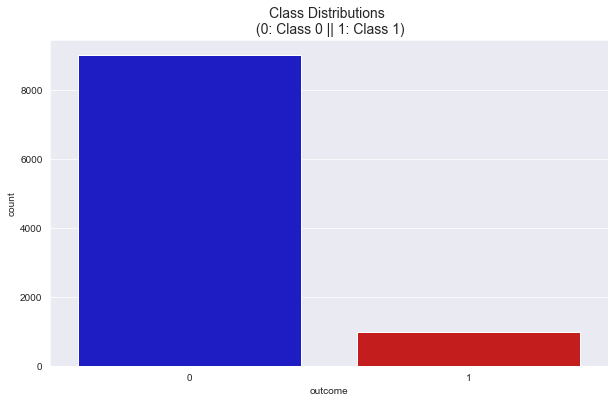

In [16]:

import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]

sns.countplot('outcome', data=train_df, palette=colors)
plt.title('Class Distributions \n (0: Class 0 || 1: Class 1)', fontsize=14)

In [17]:
train_df = train_df.dropna(subset=['gender'])

Text(0.5, 1.0, 'Class Distributions \n (0: Class 0 || 1: Class 1)')

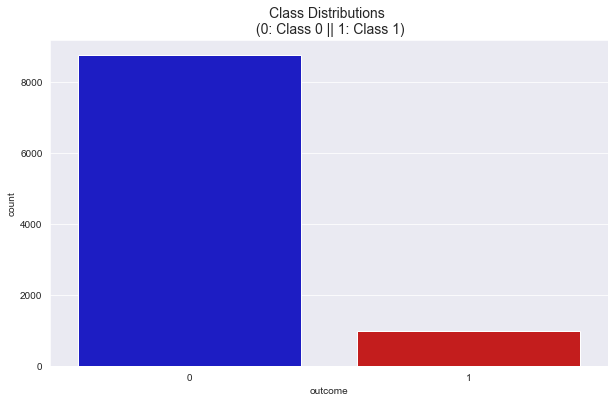

In [18]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('outcome', data=train_df, palette=colors)
plt.title('Class Distributions \n (0: Class 0 || 1: Class 1)', fontsize=14)

In [19]:
#divide the training data into training and validation
from sklearn.model_selection import train_test_split
X = train_df.drop('outcome', axis=1)
y = train_df['outcome']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)


In [20]:
X_train

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
3657,45,0.004550,Android,F,0,46800,2,1,8
4990,59,0.004221,laptop,M,0,93232,1,2,2
573,42,0.003764,desktop,M,1,50932,2,1,8
908,39,0.005135,iPhone,M,1,39431,1,1,6
7761,46,0.004626,Android,F,1,75183,1,2,14
...,...,...,...,...,...,...,...,...,...
8108,41,0.005732,iPhone,M,0,56892,1,1,1
9485,59,0.006580,iPhone,F,0,59718,2,1,21
4985,48,0.004395,other,M,1,52873,2,2,6
3345,60,0.006241,iPhone,F,0,95097,2,1,12


In [21]:
#concatenate train df and validation df 
new_train_df = pd.concat([X_train, y_train], axis=1)
new_train_df

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
3657,45,0.004550,Android,F,0,46800,2,1,8,0
4990,59,0.004221,laptop,M,0,93232,1,2,2,0
573,42,0.003764,desktop,M,1,50932,2,1,8,0
908,39,0.005135,iPhone,M,1,39431,1,1,6,0
7761,46,0.004626,Android,F,1,75183,1,2,14,0
...,...,...,...,...,...,...,...,...,...,...
8108,41,0.005732,iPhone,M,0,56892,1,1,1,1
9485,59,0.006580,iPhone,F,0,59718,2,1,21,0
4985,48,0.004395,other,M,1,52873,2,2,6,0
3345,60,0.006241,iPhone,F,0,95097,2,1,12,0


In [22]:
#get counts of rows with class 1 and 0 respectively
rslt_df_0 = new_train_df.loc[new_train_df['outcome'] == 0]
rslt_df_0.count()


age                           6132
cost_of_ad                    6132
device_type                   6132
gender                        6132
in_initial_launch_location    6132
income                        6132
n_drivers                     6132
n_vehicles                    6132
prior_ins_tenure              6132
outcome                       6132
dtype: int64

In [23]:
rslt_df_1 = new_train_df.loc[new_train_df['outcome'] == 1]
rslt_df_1.count()

age                           679
cost_of_ad                    679
device_type                   679
gender                        679
in_initial_launch_location    679
income                        679
n_drivers                     679
n_vehicles                    679
prior_ins_tenure              679
outcome                       679
dtype: int64

# One-hot-encoding: 

When extracting features, from a dataset, it is often useful to transform categorical features into vectors so that you can do vector operations. We are going to perform this technique on 'device_type' and 'gender'

In [24]:
#categorical data
categorical_cols = ['device_type', 'gender'] 
#import pandas as pd
new_train_df = pd.get_dummies(new_train_df, columns = categorical_cols)
new_train_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
3657,45,0.004550,0,46800,2,1,8,0,1,0,0,0,0,1,0
4990,59,0.004221,0,93232,1,2,2,0,0,0,0,1,0,0,1
573,42,0.003764,1,50932,2,1,8,0,0,1,0,0,0,0,1
908,39,0.005135,1,39431,1,1,6,0,0,0,1,0,0,0,1
7761,46,0.004626,1,75183,1,2,14,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,41,0.005732,0,56892,1,1,1,1,0,0,1,0,0,0,1
9485,59,0.006580,0,59718,2,1,21,0,0,0,1,0,0,1,0
4985,48,0.004395,1,52873,2,2,6,0,0,0,0,0,1,0,1
3345,60,0.006241,0,95097,2,1,12,0,0,0,1,0,0,1,0


In [25]:
cols = list(new_train_df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('outcome')) #Remove outcome
new_train_df = new_train_df[cols+['outcome']] 
new_train_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M,outcome
3657,45,0.004550,0,46800,2,1,8,1,0,0,0,0,1,0,0
4990,59,0.004221,0,93232,1,2,2,0,0,0,1,0,0,1,0
573,42,0.003764,1,50932,2,1,8,0,1,0,0,0,0,1,0
908,39,0.005135,1,39431,1,1,6,0,0,1,0,0,0,1,0
7761,46,0.004626,1,75183,1,2,14,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,41,0.005732,0,56892,1,1,1,0,0,1,0,0,0,1,1
9485,59,0.006580,0,59718,2,1,21,0,0,1,0,0,1,0,0
4985,48,0.004395,1,52873,2,2,6,0,0,0,0,1,0,1,0
3345,60,0.006241,0,95097,2,1,12,0,0,1,0,0,1,0,0


In [26]:
Train_X = new_train_df.iloc[:,0:14];
Train_y = new_train_df.iloc[ :, -1:];

Train_X

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
3657,45,0.004550,0,46800,2,1,8,1,0,0,0,0,1,0
4990,59,0.004221,0,93232,1,2,2,0,0,0,1,0,0,1
573,42,0.003764,1,50932,2,1,8,0,1,0,0,0,0,1
908,39,0.005135,1,39431,1,1,6,0,0,1,0,0,0,1
7761,46,0.004626,1,75183,1,2,14,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,41,0.005732,0,56892,1,1,1,0,0,1,0,0,0,1
9485,59,0.006580,0,59718,2,1,21,0,0,1,0,0,1,0
4985,48,0.004395,1,52873,2,2,6,0,0,0,0,1,0,1
3345,60,0.006241,0,95097,2,1,12,0,0,1,0,0,1,0


In [27]:
Train_y

,outcome
3657,0
4990,0
573,0
908,0
7761,0
...,...
8108,1
9485,0
4985,0
3345,0


# Upsampling using SMOTE

In [28]:
# import SMOTE module from imblearn library 
!pip install imblearn -U
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(Train_X, Train_y.values.ravel()) 

  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Requirement already up-to-date: imblearn in /Users/megs/anaconda3/lib/python3.6/site-packages (0.0)
After OverSampling, the shape of train_X: (12264, 14)
After OverSampling, the shape of train_y: (12264,) 

After OverSampling, counts of label '1': 6132
After OverSampling, counts of label '0': 6132


In [29]:
X_train_res

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
0,45,0.004550,0,46800,2,1,8,1,0,0,0,0,1,0
1,59,0.004221,0,93232,1,2,2,0,0,0,1,0,0,1
2,42,0.003764,1,50932,2,1,8,0,1,0,0,0,0,1
3,39,0.005135,1,39431,1,1,6,0,0,1,0,0,0,1
4,46,0.004626,1,75183,1,2,14,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,45,0.004094,1,64265,1,1,5,0,0,0,0,0,0,0
12260,56,0.004658,1,65179,2,1,10,0,0,0,0,0,0,0
12261,50,0.004434,1,83408,2,1,15,0,0,0,0,0,0,0
12262,20,0.004766,0,23847,1,1,0,0,0,0,0,0,0,0


In [30]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1])

In [31]:
y_train_res = pd.DataFrame(data=y_train_res, columns=["outcome"])
print(y_train_res)


       outcome
0            0
1            0
2            0
3            0
4            0
...        ...
12259        1
12260        1
12261        1
12262        1
12263        1

[12264 rows x 1 columns]


In [32]:
sampled_train_df = pd.concat([X_train_res, y_train_res], axis=1)
sampled_train_df.rename(columns={'0':'outcome'}, inplace=True)
sampled_train_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M,outcome
0,45,0.004550,0,46800,2,1,8,1,0,0,0,0,1,0,0
1,59,0.004221,0,93232,1,2,2,0,0,0,1,0,0,1,0
2,42,0.003764,1,50932,2,1,8,0,1,0,0,0,0,1,0
3,39,0.005135,1,39431,1,1,6,0,0,1,0,0,0,1,0
4,46,0.004626,1,75183,1,2,14,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,45,0.004094,1,64265,1,1,5,0,0,0,0,0,0,0,1
12260,56,0.004658,1,65179,2,1,10,0,0,0,0,0,0,0,1
12261,50,0.004434,1,83408,2,1,15,0,0,0,0,0,0,0,1
12262,20,0.004766,0,23847,1,1,0,0,0,0,0,0,0,0,1


# Validation data one-hot encoding

In [33]:
val_df = pd.concat([X_val, y_val], axis=1)
val_df

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
3951,48,0.004595,desktop,F,1,62494,1,3,4,0
6945,28,0.004864,other,F,0,67434,2,1,0,0
8596,54,0.003753,laptop,M,0,90458,2,2,8,0
2252,31,0.004881,iPhone,M,1,56422,2,3,5,0
9284,23,0.004815,desktop,F,1,61356,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...
4076,43,0.004301,desktop,M,1,55102,2,1,5,1
8740,38,0.005378,desktop,F,0,40183,2,2,4,1
5439,31,0.004465,laptop,F,1,31874,2,1,6,0
5210,31,0.004597,other,F,1,32515,1,1,7,0


In [34]:
categorical_cols = ['device_type', 'gender'] 

#import pandas as pd
encoded_val_df = pd.get_dummies(val_df, columns = categorical_cols)
encoded_val_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
3951,48,0.004595,1,62494,1,3,4,0,0,1,0,0,0,1,0
6945,28,0.004864,0,67434,2,1,0,0,0,0,0,0,1,1,0
8596,54,0.003753,0,90458,2,2,8,0,0,0,0,1,0,0,1
2252,31,0.004881,1,56422,2,3,5,0,0,0,1,0,0,0,1
9284,23,0.004815,1,61356,2,2,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,43,0.004301,1,55102,2,1,5,1,0,1,0,0,0,0,1
8740,38,0.005378,0,40183,2,2,4,1,0,1,0,0,0,1,0
5439,31,0.004465,1,31874,2,1,6,0,0,0,0,1,0,1,0
5210,31,0.004597,1,32515,1,1,7,0,0,0,0,0,1,1,0


In [35]:
cols_valdf = list(encoded_val_df.columns.values) #Make a list of all of the columns in the df
cols_valdf.pop(cols_valdf.index('outcome')) #Remove outcome
final_val_df = encoded_val_df[cols_valdf+['outcome']] 
final_val_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M,outcome
3951,48,0.004595,1,62494,1,3,4,0,1,0,0,0,1,0,0
6945,28,0.004864,0,67434,2,1,0,0,0,0,0,1,1,0,0
8596,54,0.003753,0,90458,2,2,8,0,0,0,1,0,0,1,0
2252,31,0.004881,1,56422,2,3,5,0,0,1,0,0,0,1,0
9284,23,0.004815,1,61356,2,2,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,43,0.004301,1,55102,2,1,5,0,1,0,0,0,0,1,1
8740,38,0.005378,0,40183,2,2,4,0,1,0,0,0,1,0,1
5439,31,0.004465,1,31874,2,1,6,0,0,0,1,0,1,0,0
5210,31,0.004597,1,32515,1,1,7,0,0,0,0,1,1,0,0


In [36]:
final_X_val = final_val_df.iloc [:,0:14]

final_y_val = final_val_df.iloc [ :, -1:]
#final_y_val = final_val_df['outcome']

In [37]:
final_X_val

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
3951,48,0.004595,1,62494,1,3,4,0,1,0,0,0,1,0
6945,28,0.004864,0,67434,2,1,0,0,0,0,0,1,1,0
8596,54,0.003753,0,90458,2,2,8,0,0,0,1,0,0,1
2252,31,0.004881,1,56422,2,3,5,0,0,1,0,0,0,1
9284,23,0.004815,1,61356,2,2,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,43,0.004301,1,55102,2,1,5,0,1,0,0,0,0,1
8740,38,0.005378,0,40183,2,2,4,0,1,0,0,0,1,0
5439,31,0.004465,1,31874,2,1,6,0,0,0,1,0,1,0
5210,31,0.004597,1,32515,1,1,7,0,0,0,0,1,1,0


In [38]:
final_y_val

,outcome
3951,0
6945,0
8596,0
2252,0
9284,1
...,...
4076,1
8740,1
5439,0
5210,0


In [39]:
test_df = pd.read_csv("data/test.csv")
test_df.head(5)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [40]:
test_df.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        249
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
dtype: int64

In [41]:
#Remove null
test_df = test_df.dropna(subset=['gender'])

In [42]:
categorical_cols_test = ['device_type', 'gender'] 

import pandas as pd
test_df = pd.get_dummies(test_df, columns = categorical_cols_test)
test_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
0,34,0.005134,1,40376,1,3,7,1,0,0,0,0,1,0
1,53,0.005223,1,84511,1,1,11,0,1,0,0,0,1,0
2,46,0.004939,0,79322,1,1,4,0,0,0,1,0,1,0
3,36,0.004924,0,63295,1,2,0,1,0,0,0,0,1,0
4,28,0.005146,1,36170,1,3,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50,0.005927,1,78899,2,3,14,0,0,1,0,0,0,1
9996,24,0.005138,1,26703,1,3,2,1,0,0,0,0,1,0
9997,40,0.006225,1,62402,1,2,3,0,0,1,0,0,1,0
9998,38,0.004601,1,58663,1,1,9,0,0,0,0,1,1,0


In [43]:
cols = list(test_df.columns.values) #Make a list of all of the columns in the df
test_df = test_df[cols] 
test_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
0,34,0.005134,1,40376,1,3,7,1,0,0,0,0,1,0
1,53,0.005223,1,84511,1,1,11,0,1,0,0,0,1,0
2,46,0.004939,0,79322,1,1,4,0,0,0,1,0,1,0
3,36,0.004924,0,63295,1,2,0,1,0,0,0,0,1,0
4,28,0.005146,1,36170,1,3,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50,0.005927,1,78899,2,3,14,0,0,1,0,0,0,1
9996,24,0.005138,1,26703,1,3,2,1,0,0,0,0,1,0
9997,40,0.006225,1,62402,1,2,3,0,0,1,0,0,1,0
9998,38,0.004601,1,58663,1,1,9,0,0,0,0,1,1,0


# Perform Feature Engineering and Selection using Trained Data

In [44]:
data_features = sampled_train_df.iloc[:,0:14].columns

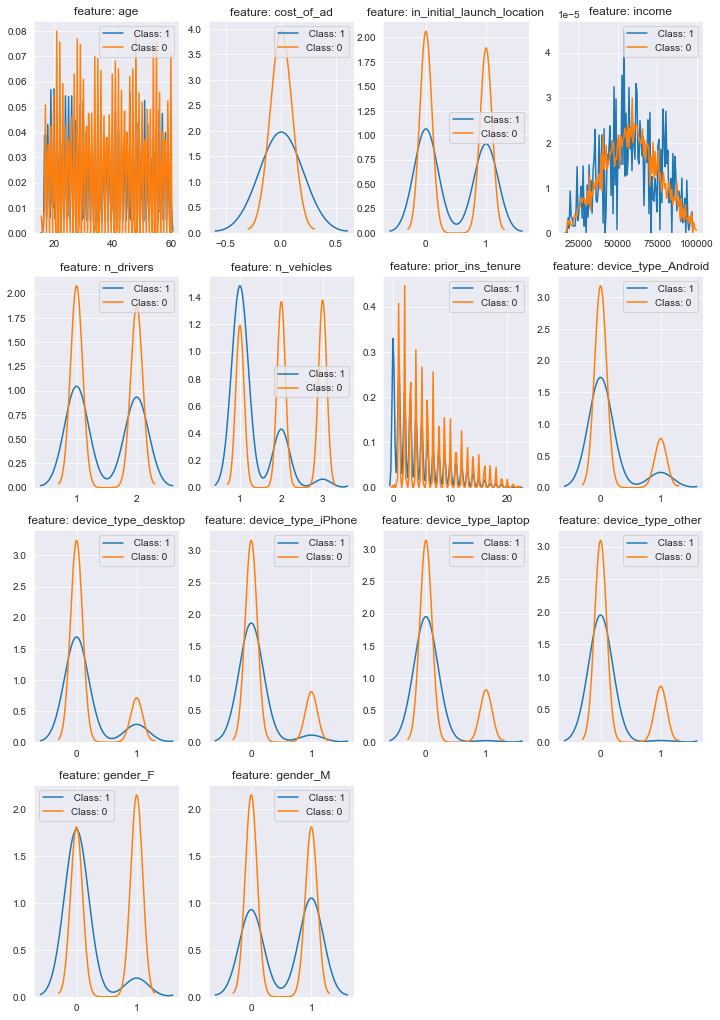

In [45]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(sampled_train_df[data_features]):
    ax = plt.subplot(gs[i])
    sns.kdeplot(sampled_train_df[cn][sampled_train_df.outcome == 1],label=" Class: 1",bw=0.2)
    sns.kdeplot(sampled_train_df[cn][sampled_train_df.outcome == 0],label="Class: 0",bw=0.1)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

# 1. Select Feature Based on Correlation

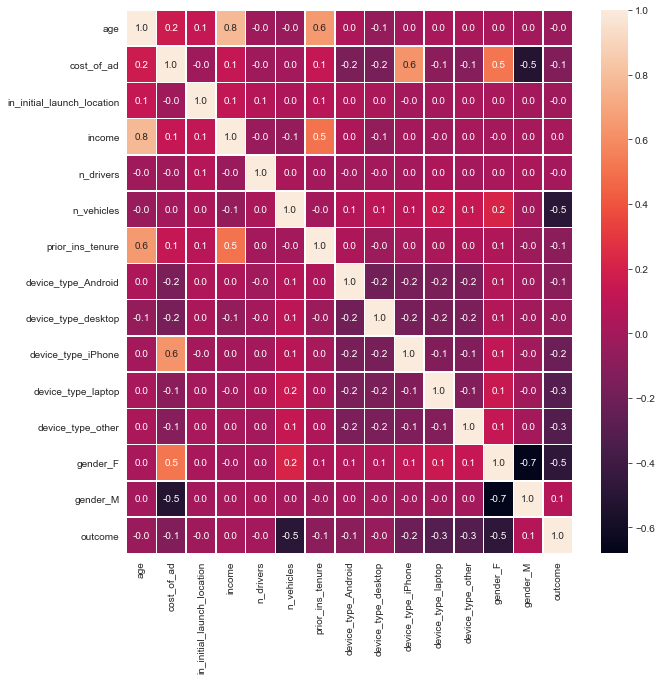

In [46]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(sampled_train_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

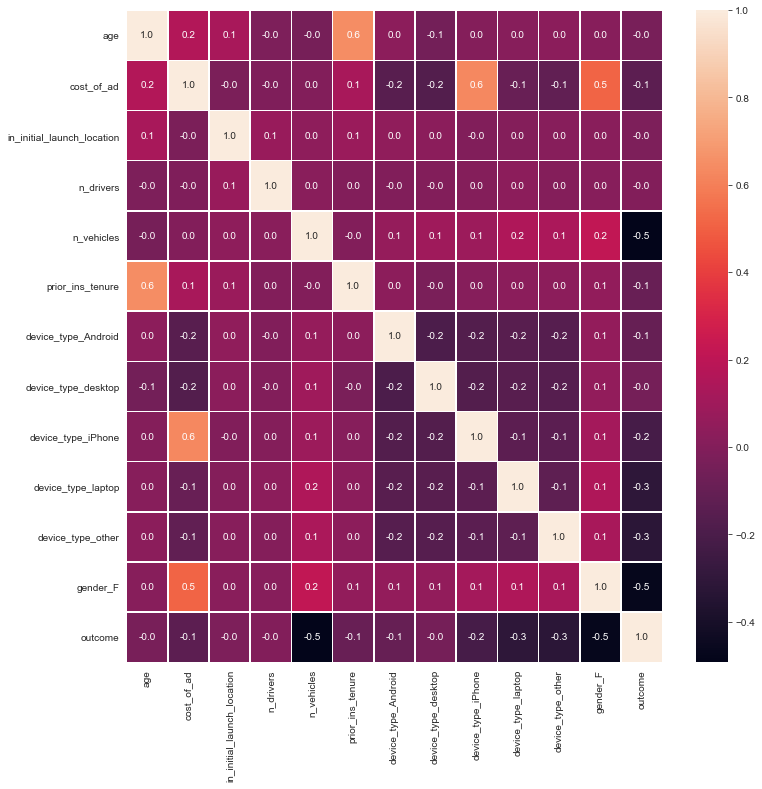

In [47]:
corr = sampled_train_df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if (corr.iloc[i,j] >= 0.7 or corr.iloc[i,j] <= -0.6):
            if columns[j]:
                columns[j] = False
selected_columns = sampled_train_df.columns[columns]
corr_feature_df = sampled_train_df[selected_columns]

#draw heatmap
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_feature_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


Perform classification using correlation matrix: implement logistic regression on correlation matrix

In [48]:
#prepare dataset for train and validation
corr_train_df = sampled_train_df [selected_columns]
corr_train_df

,age,cost_of_ad,in_initial_launch_location,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,outcome
0,45,0.004550,0,2,1,8,1,0,0,0,0,1,0
1,59,0.004221,0,1,2,2,0,0,0,1,0,0,0
2,42,0.003764,1,2,1,8,0,1,0,0,0,0,0
3,39,0.005135,1,1,1,6,0,0,1,0,0,0,0
4,46,0.004626,1,1,2,14,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,45,0.004094,1,1,1,5,0,0,0,0,0,0,1
12260,56,0.004658,1,2,1,10,0,0,0,0,0,0,1
12261,50,0.004434,1,2,1,15,0,0,0,0,0,0,1
12262,20,0.004766,0,1,1,0,0,0,0,0,0,0,1


In [49]:
corr_val_df = final_val_df[selected_columns]
corr_val_df

,age,cost_of_ad,in_initial_launch_location,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,outcome
3951,48,0.004595,1,1,3,4,0,1,0,0,0,1,0
6945,28,0.004864,0,2,1,0,0,0,0,0,1,1,0
8596,54,0.003753,0,2,2,8,0,0,0,1,0,0,0
2252,31,0.004881,1,2,3,5,0,0,1,0,0,0,0
9284,23,0.004815,1,2,2,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,43,0.004301,1,2,1,5,0,1,0,0,0,0,1
8740,38,0.005378,0,2,2,4,0,1,0,0,0,1,1
5439,31,0.004465,1,2,1,6,0,0,0,1,0,1,0
5210,31,0.004597,1,1,1,7,0,0,0,0,1,1,0


In [50]:
X_train_corr = corr_train_df.iloc[:,0:12];
y_train_corr = corr_train_df.iloc[ :, -1:]
X_val_corr = corr_val_df.iloc[:,0:12];
#y_val_corr = corr_val_df.iloc[ :, -1:]
y_val_corr = corr_val_df['outcome']

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_corr = LogisticRegression()
model_corr=logreg_corr.fit(X_train_corr, y_train_corr)
y_pred_corr = model_corr.predict(X_val_corr)

In [52]:
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(model_corr.score(X_val_corr, y_val_corr)))

Accuracy of logistic regression classifier on validation set: 0.86


In [53]:
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report 
print("=== Confusion Matrix ===")
#print(confusion_matrix(y_val_corr, y_pred_corr))
print(pd.DataFrame(confusion_matrix(y_val_corr, y_pred_corr),
                  columns=['actual_neg', 'actual_pos'], index=['pred_neg', 'pred_pos']))
print('\n')

print(classification_report(y_val_corr, y_pred_corr))

=== Confusion Matrix ===
          actual_neg  actual_pos
pred_neg        2386         240
pred_pos         179         115


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2626
           1       0.32      0.39      0.35       294

    accuracy                           0.86      2920
   macro avg       0.63      0.65      0.64      2920
weighted avg       0.87      0.86      0.86      2920



auc score is 0.7758340198227044


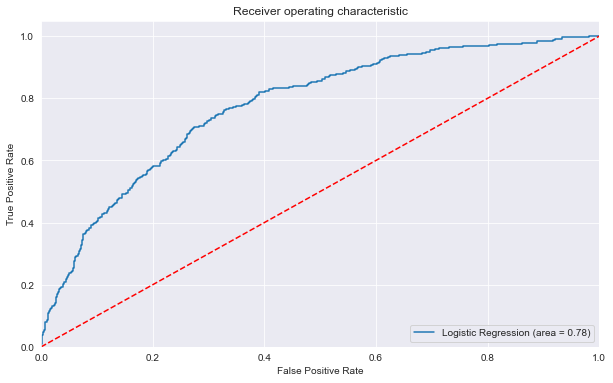

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_val_corr, model_corr.predict_proba(X_val_corr)[:,1])
print('auc score is',logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_val_corr, model_corr.predict_proba(X_val_corr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [55]:
import yellowbrick
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError




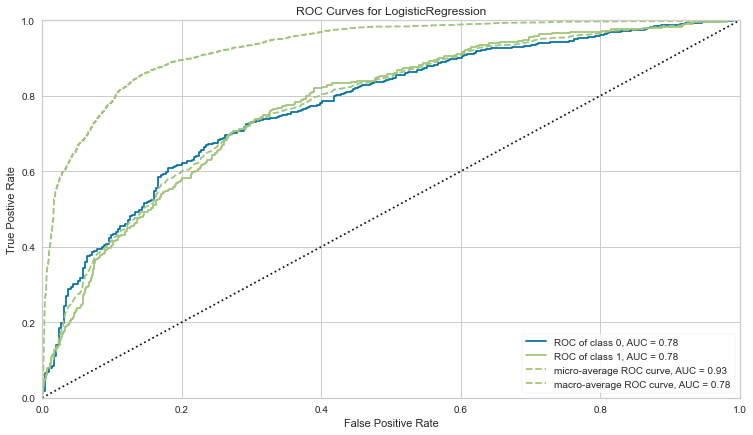

In [56]:
outcome = ['0','1']
rocauc = ROCAUC(model_corr, size=(900, 500), classes=outcome)

rocauc.score(X_val_corr, y_val_corr)  
r = rocauc.poof(classes=outcome)

Class prediction Error

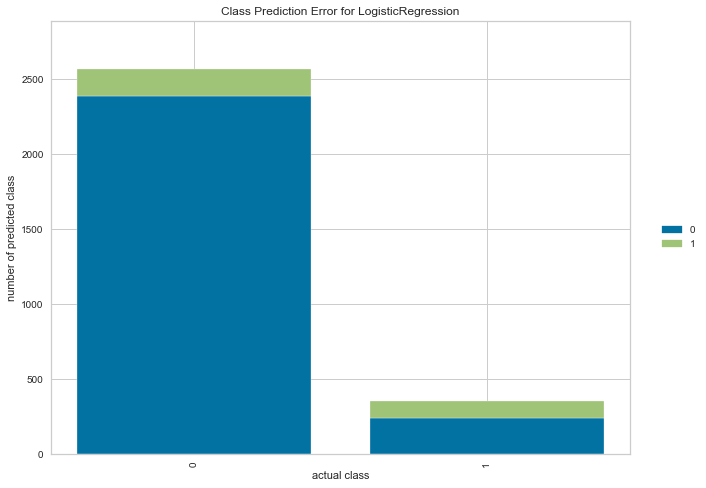

In [57]:
outcome = ['0', '1']
#LogisticRegression(random_state=42)
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    model_corr,size=(800,500), classes=outcome
)

# Fit the training data to the visualizer
visualizer.fit(X_train_corr, y_train_corr)

# Evaluate the model on the test data
visualizer.score(X_val_corr, y_val_corr)

# Draw visualization
visualizer.show()

# 2. RFECV (Recursive Feature Elimination with Cross-Validation)
lets perform backward feature selection algorithm and see which features are strongly correlated with the outcome variable. Using Hypothesis testing. 

In [58]:
rec_X_df = pd.concat([X_train_res,final_X_val], axis=0)
rec_y_df = pd.concat([y_train_res,final_y_val], axis=0)

Explore Base algorithm

>lr 0.825 (0.009)
>per 0.827 (0.014)
>cart 0.825 (0.011)
>rf 0.813 (0.010)
>gbm 0.842 (0.010)


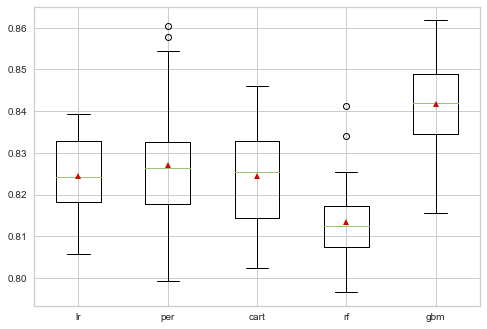

In [59]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

def get_dataset():
	rec_X_df = pd.concat([X_train_res,final_X_val], axis=0)
	rec_y_df = pd.concat([y_train_res,final_y_val], axis=0)
	return rec_X_df, rec_y_df

# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, rec_X_df, rec_y_df, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


# define dataset
rec_X_df, rec_y_df = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>2 0.778 (0.010)
>3 0.809 (0.010)
>4 0.827 (0.009)
>5 0.842 (0.010)
>6 0.857 (0.010)
>7 0.866 (0.010)
>8 0.892 (0.007)
>9 0.896 (0.008)
>10 0.888 (0.008)
>11 0.890 (0.006)
>12 0.896 (0.006)
>13 0.893 (0.007)
>14 0.895 (0.009)


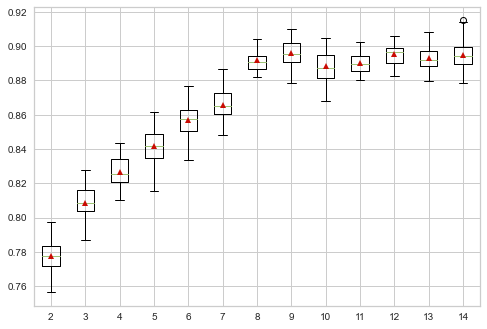

In [60]:

# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	rec_X_df = pd.concat([X_train_res,final_X_val], axis=0)
	rec_y_df = pd.concat([y_train_res,final_y_val], axis=0)
	return rec_X_df, rec_y_df
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, rec_X_df, rec_y_df, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
rec_X_df, rec_y_df = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Which Features Were Selected?

In [61]:
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=12)
# fit RFE
rfe_1=rfe.fit(rec_X_df, rec_y_df)
# summarize all features
for i in range(rec_X_df.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))


Column: 0, Selected False, Rank: 2.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 3.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000


In [62]:
rfe_y_pred = rfe_1.predict(final_X_val)
print('Accuracy of Gradient boosting classifier on validation set: {:.2f}'.format(rfe_1.score(final_X_val, final_y_val)))

Accuracy of Gradient boosting classifier on validation set: 0.88


In [63]:
# print classification report 
print("=== Confusion Matrix ===")
#print(confusion_matrix(final_y_val, rfe_y_pred))
print(pd.DataFrame(confusion_matrix(final_y_val, rfe_y_pred),
                  columns=['actual_neg', 'actual_pos'], index=['pred_neg', 'pred_pos']))

print('\n')

print(classification_report(final_y_val, rfe_y_pred))

=== Confusion Matrix ===
          actual_neg  actual_pos
pred_neg        2459         167
pred_pos         194         100


              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2626
           1       0.37      0.34      0.36       294

    accuracy                           0.88      2920
   macro avg       0.65      0.64      0.64      2920
weighted avg       0.87      0.88      0.87      2920



auc score is 0.8268492469341125


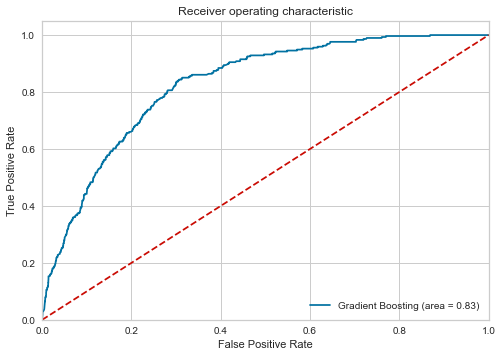

In [64]:
gradient_boost_roc_auc = roc_auc_score(final_y_val, rfe_1.predict_proba(final_X_val)[:,1])
print('auc score is',gradient_boost_roc_auc)
fpr, tpr, thresholds = roc_curve(final_y_val, rfe_1.predict_proba(final_X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gradient_boost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GradientBoost_ROC')
plt.show()

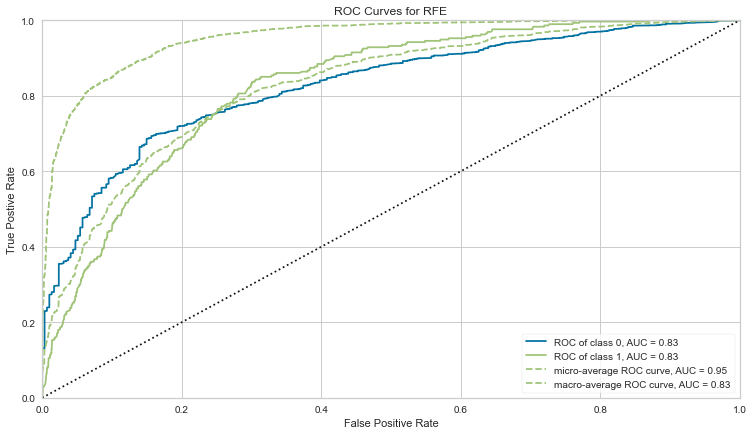

In [65]:
outcome = ['0','1']
rocauc = ROCAUC(rfe_1, size=(900, 500), classes=outcome)
rocauc.score(final_X_val, final_y_val)  
r = rocauc.poof()

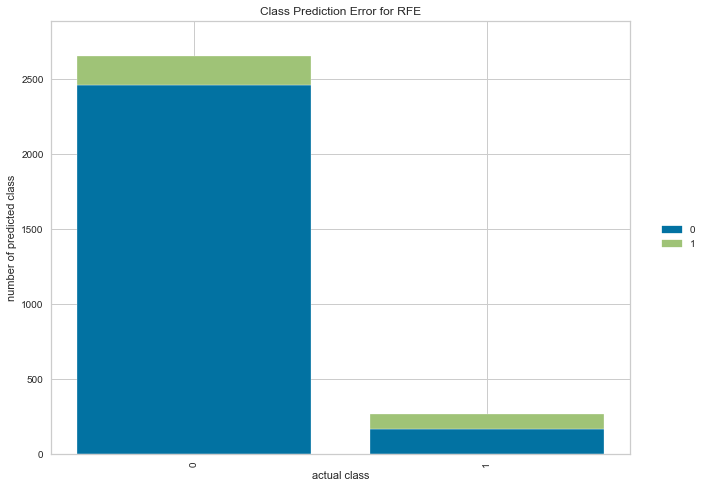

In [66]:
outcome = ['0', '1']

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    rfe_1,size=(800,500), classes=outcome
)

# Fit the training data to the visualizer
visualizer.fit(rec_X_df, rec_y_df)
final_y_val = final_val_df['outcome']
# Evaluate the model on the test data
visualizer.score(final_X_val, final_y_val)

# Draw visualization
visualizer.show()

# 3. ANOVA feature selection for numeric input and categorical output

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
# generate dataset
train_df_X = sampled_train_df.iloc[:,0:14];
train_df_y = sampled_train_df.iloc[ :, -1:];
# define feature selection
fs = SelectKBest(f_classif, k=12)
# apply feature selection
X_selected = fs.fit(train_df_X, train_df_y)
pd.DataFrame({'variable': train_df_X.columns,
              'score_f_anova': fs.scores_})


,variable,score_f_anova
0,age,12.844209
1,cost_of_ad,228.685849
2,in_initial_launch_location,3.406002
3,income,1.572738
4,n_drivers,0.064105
5,n_vehicles,3933.569455
6,prior_ins_tenure,105.622879
7,device_type_Android,128.828924
8,device_type_desktop,27.729894
9,device_type_iPhone,597.223432


In [68]:
X_selected.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [69]:
selected_anova_feat= train_df_X.columns[(X_selected.get_support())]
len(selected_anova_feat)

12

In [70]:
print(selected_anova_feat)

Index(['age', 'cost_of_ad', 'in_initial_launch_location', 'n_vehicles',
       'prior_ins_tenure', 'device_type_Android', 'device_type_desktop',
       'device_type_iPhone', 'device_type_laptop', 'device_type_other',
       'gender_F', 'gender_M'],
      dtype='object')


In [71]:
anova_train_dataframe = pd.concat([sampled_train_df[selected_anova_feat], sampled_train_df["outcome"]],axis=1)
anova_train_dataframe

,age,cost_of_ad,in_initial_launch_location,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M,outcome
0,45,0.004550,0,1,8,1,0,0,0,0,1,0,0
1,59,0.004221,0,2,2,0,0,0,1,0,0,1,0
2,42,0.003764,1,1,8,0,1,0,0,0,0,1,0
3,39,0.005135,1,1,6,0,0,1,0,0,0,1,0
4,46,0.004626,1,2,14,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,45,0.004094,1,1,5,0,0,0,0,0,0,0,1
12260,56,0.004658,1,1,10,0,0,0,0,0,0,0,1
12261,50,0.004434,1,1,15,0,0,0,0,0,0,0,1
12262,20,0.004766,0,1,0,0,0,0,0,0,0,0,1


In [72]:
anova_val_dataframe = pd.concat([final_val_df[selected_anova_feat], final_val_df["outcome"]],axis=1)

anova_val_dataframe

,age,cost_of_ad,in_initial_launch_location,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M,outcome
3951,48,0.004595,1,3,4,0,1,0,0,0,1,0,0
6945,28,0.004864,0,1,0,0,0,0,0,1,1,0,0
8596,54,0.003753,0,2,8,0,0,0,1,0,0,1,0
2252,31,0.004881,1,3,5,0,0,1,0,0,0,1,0
9284,23,0.004815,1,2,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,43,0.004301,1,1,5,0,1,0,0,0,0,1,1
8740,38,0.005378,0,2,4,0,1,0,0,0,1,0,1
5439,31,0.004465,1,1,6,0,0,0,1,0,1,0,0
5210,31,0.004597,1,1,7,0,0,0,0,1,1,0,0


In [73]:
X_train_anova = anova_train_dataframe.iloc[:,0:12];
X_train_anova

,age,cost_of_ad,in_initial_launch_location,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
0,45,0.004550,0,1,8,1,0,0,0,0,1,0
1,59,0.004221,0,2,2,0,0,0,1,0,0,1
2,42,0.003764,1,1,8,0,1,0,0,0,0,1
3,39,0.005135,1,1,6,0,0,1,0,0,0,1
4,46,0.004626,1,2,14,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12259,45,0.004094,1,1,5,0,0,0,0,0,0,0
12260,56,0.004658,1,1,10,0,0,0,0,0,0,0
12261,50,0.004434,1,1,15,0,0,0,0,0,0,0
12262,20,0.004766,0,1,0,0,0,0,0,0,0,0


In [74]:
#split final_train_df into x_train and y_train

X_train_anova = anova_train_dataframe.iloc[:,0:12];
y_train_anova = anova_train_dataframe.iloc[ :, -1:]
X_val_anova = anova_val_dataframe.iloc[:,0:12];
y_val_anova = anova_val_dataframe["outcome"]



In [75]:
logreg = LogisticRegression()
anova_logreg=logreg.fit(X_train_anova, y_train_anova)

In [76]:
y_pred = anova_logreg.predict(X_val_anova)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(anova_logreg.score(X_val_anova, y_val_anova)))

Accuracy of logistic regression classifier on validation set: 0.87


In [77]:
# print classification report 
# print classification report 
print("=== Confusion Matrix ===")
#print(confusion_matrix(y_val_anova, y_pred))
print(pd.DataFrame(confusion_matrix(y_val_anova, y_pred),
                  columns=['actual_neg', 'actual_pos'], index=['pred_neg', 'pred_pos']))
print('\n')
print(classification_report(y_val_anova, y_pred))

=== Confusion Matrix ===
          actual_neg  actual_pos
pred_neg        2454         172
pred_pos         208          86


              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2626
           1       0.33      0.29      0.31       294

    accuracy                           0.87      2920
   macro avg       0.63      0.61      0.62      2920
weighted avg       0.86      0.87      0.87      2920



auc score is 0.7741074342913098


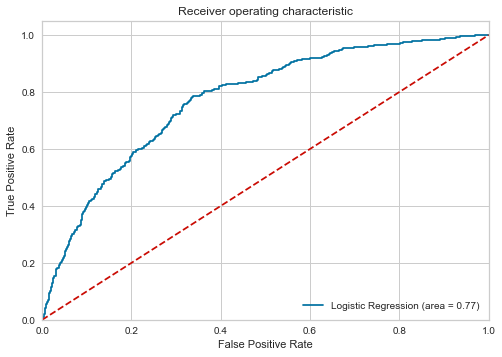

In [78]:
logit_roc_auc = roc_auc_score(y_val_anova, anova_logreg.predict_proba(X_val_anova)[:,1])
print('auc score is',logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_val_anova, anova_logreg.predict_proba(X_val_anova)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

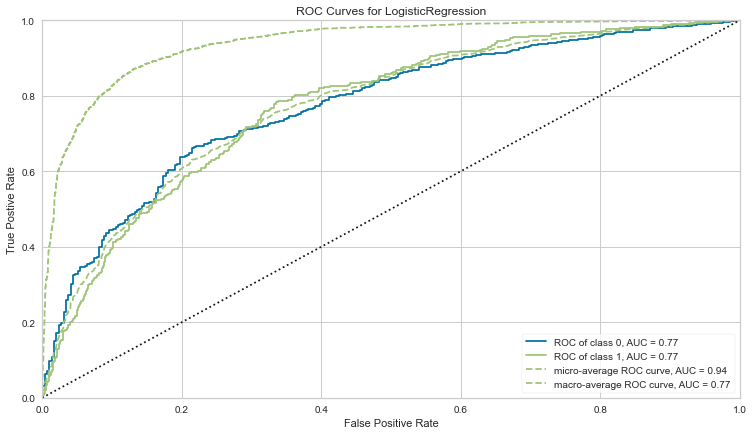

In [79]:
outcome = ['0','1']
rocauc = ROCAUC(anova_logreg, size=(900, 500), classes=outcome)
rocauc.score(X_val_anova, y_val_anova)  
r = rocauc.poof()

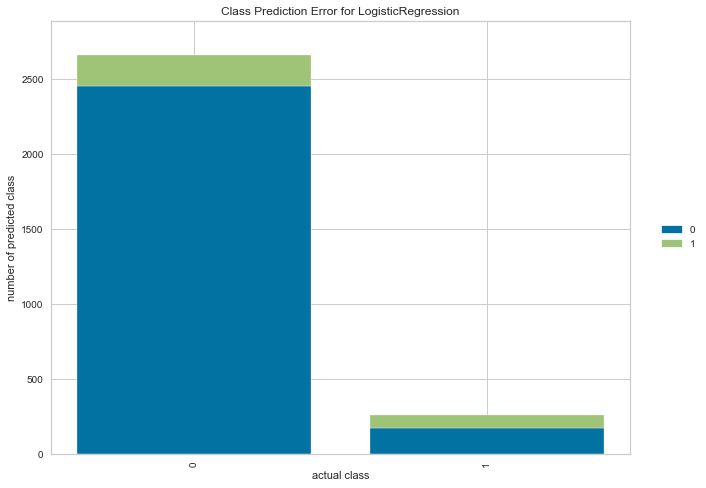

In [80]:
outcome = ['0', '1']

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    anova_logreg,size=(800,500), classes=outcome
)

# Fit the training data to the visualizer
visualizer.fit(X_train_anova, y_train_anova)

# Evaluate the model on the test data
visualizer.score(X_val_anova, y_val_anova)

# Draw visualization
visualizer.show()

# 4. Random Forest for Feature Selection and Prediction

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [82]:
X_train_res
y_train_res
#train_df_X = sampled_train_df.iloc[:,0:14];
#train_df_y = sampled_train_df.iloc[ :, -1:]
#train_df_y = sampled_train_df['outcome']

,outcome
0,0
1,0
2,0
3,0
4,0
...,...
12259,1
12260,1
12261,1
12262,1


In [83]:
X_train_res

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
0,45,0.004550,0,46800,2,1,8,1,0,0,0,0,1,0
1,59,0.004221,0,93232,1,2,2,0,0,0,1,0,0,1
2,42,0.003764,1,50932,2,1,8,0,1,0,0,0,0,1
3,39,0.005135,1,39431,1,1,6,0,0,1,0,0,0,1
4,46,0.004626,1,75183,1,2,14,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,45,0.004094,1,64265,1,1,5,0,0,0,0,0,0,0
12260,56,0.004658,1,65179,2,1,10,0,0,0,0,0,0,0
12261,50,0.004434,1,83408,2,1,15,0,0,0,0,0,0,0
12262,20,0.004766,0,23847,1,1,0,0,0,0,0,0,0,0


In [84]:
y_train_res

,outcome
0,0
1,0
2,0
3,0
4,0
...,...
12259,1
12260,1
12261,1
12262,1


In [85]:
#from sklearn.feature_selection import SelectFromModel
#sel = SelectFromModel(RandomForestClassifier(n_estimators = 300,random_state=42, max_features='sqrt',max_depth=10))
#sel.fit(train_df_X, train_df_y)

In [86]:
#sel.get_support()

In [87]:
#selected_feat= train_df_X.columns[(sel.get_support())]
#len(selected_feat)

In [88]:
#print(selected_feat)

Feature: 0, Score: 0.06837
Feature: 1, Score: 0.10859
Feature: 2, Score: 0.01579
Feature: 3, Score: 0.09284
Feature: 4, Score: 0.01341
Feature: 5, Score: 0.15583
Feature: 6, Score: 0.04960
Feature: 7, Score: 0.03300
Feature: 8, Score: 0.03012
Feature: 9, Score: 0.04581
Feature: 10, Score: 0.09453
Feature: 11, Score: 0.09576
Feature: 12, Score: 0.16102
Feature: 13, Score: 0.03532


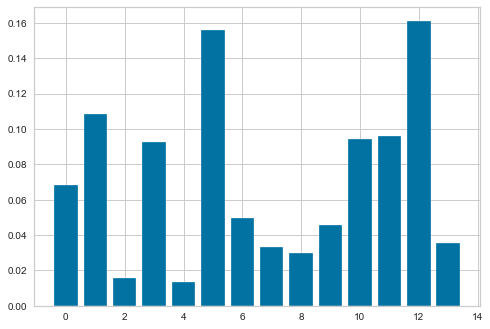

In [89]:
from matplotlib import pyplot
# define the model
model = RandomForestClassifier(n_estimators = 900,random_state=42,max_depth=150)
# fit the model
model.fit(X_train_res, y_train_res)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [90]:
randomforest_feature_df_train_X = X_train_res
randomforest_feature_df_train_X

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
0,45,0.004550,0,46800,2,1,8,1,0,0,0,0,1,0
1,59,0.004221,0,93232,1,2,2,0,0,0,1,0,0,1
2,42,0.003764,1,50932,2,1,8,0,1,0,0,0,0,1
3,39,0.005135,1,39431,1,1,6,0,0,1,0,0,0,1
4,46,0.004626,1,75183,1,2,14,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,45,0.004094,1,64265,1,1,5,0,0,0,0,0,0,0
12260,56,0.004658,1,65179,2,1,10,0,0,0,0,0,0,0
12261,50,0.004434,1,83408,2,1,15,0,0,0,0,0,0,0
12262,20,0.004766,0,23847,1,1,0,0,0,0,0,0,0,0


In [91]:
final_train_df = pd.concat([randomforest_feature_df_train_X,y_train_res],axis = 1)
final_train_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M,outcome
0,45,0.004550,0,46800,2,1,8,1,0,0,0,0,1,0,0
1,59,0.004221,0,93232,1,2,2,0,0,0,1,0,0,1,0
2,42,0.003764,1,50932,2,1,8,0,1,0,0,0,0,1,0
3,39,0.005135,1,39431,1,1,6,0,0,1,0,0,0,1,0
4,46,0.004626,1,75183,1,2,14,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,45,0.004094,1,64265,1,1,5,0,0,0,0,0,0,0,1
12260,56,0.004658,1,65179,2,1,10,0,0,0,0,0,0,0,1
12261,50,0.004434,1,83408,2,1,15,0,0,0,0,0,0,0,1
12262,20,0.004766,0,23847,1,1,0,0,0,0,0,0,0,0,1


In [92]:

final_X_val
final_y_val = final_val_df['outcome']


In [93]:
#new_test_df = test_df[['age','cost_of_ad','income','n_vehicles','prior_ins_tenure']]
#new_test_df

Perform a train-validation data modeling

Let's see how random forest performs

In [94]:
# random forest model creation
model_rfc=model.fit(randomforest_feature_df_train_X, y_train_res)
# predictions
model_predict = model_rfc.predict(final_X_val)

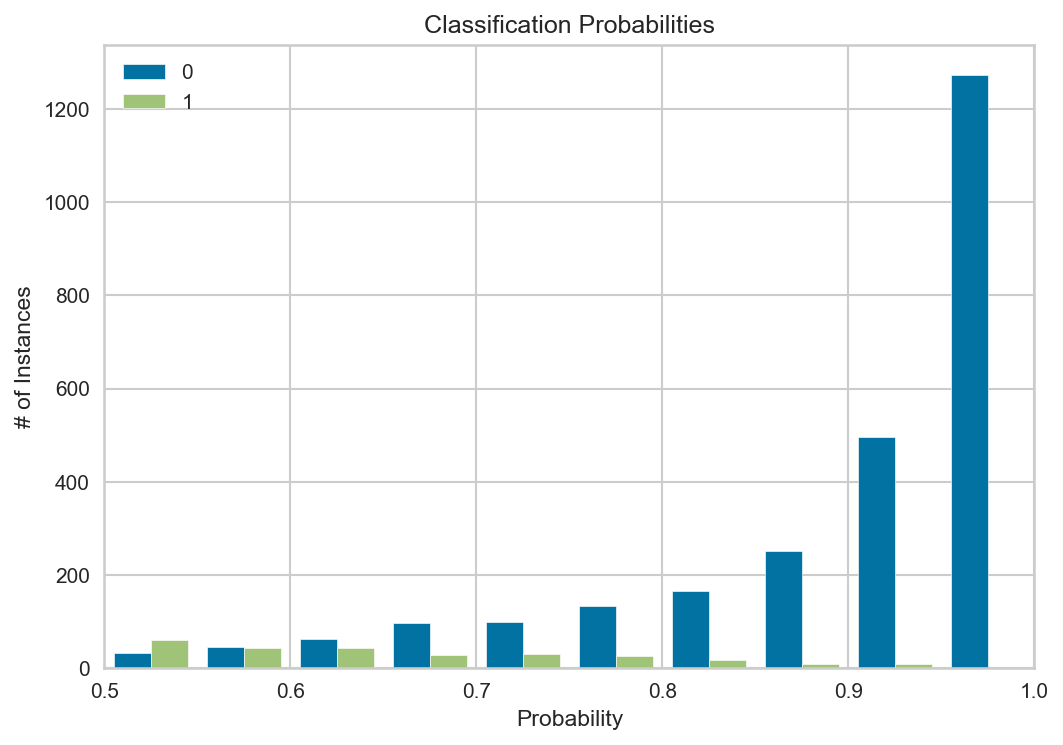

In [95]:
# get the probability distribution
probas = model_rfc.predict_proba(final_X_val)
# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(outcome)
plt.show()

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

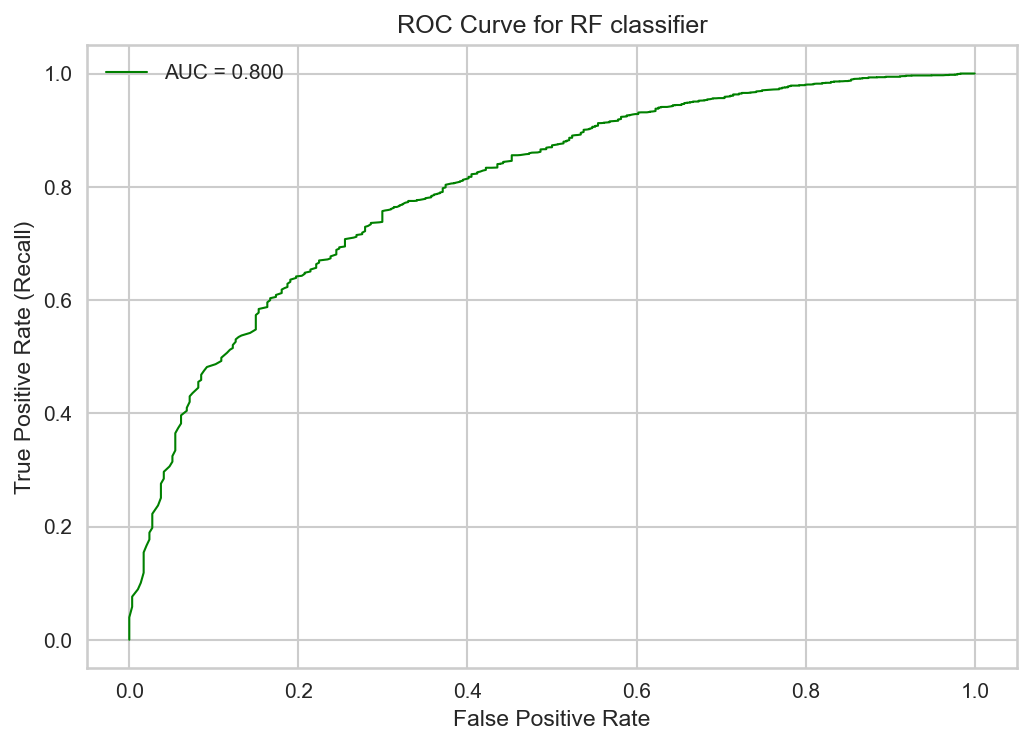

In [97]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(final_y_val, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [98]:

print("=== Confusion Matrix ===")
print(pd.DataFrame(confusion_matrix(final_y_val, model_predict),
                  columns=['actual_neg', 'actual_pos'], index=['pred_neg', 'pred_pos']))
print('\n')
print("=== Classification Report ===")
print(classification_report(final_y_val, model_predict))
print('\n')




=== Confusion Matrix ===
          actual_neg  actual_pos
pred_neg        2471         155
pred_pos         186         108


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2626
           1       0.41      0.37      0.39       294

    accuracy                           0.88      2920
   macro avg       0.67      0.65      0.66      2920
weighted avg       0.88      0.88      0.88      2920





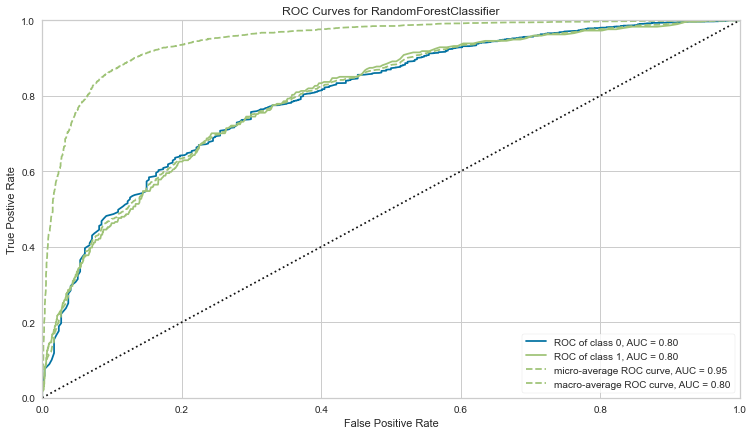

In [99]:
outcome = ['0','1']
rocauc = ROCAUC(model_rfc, size=(900, 500), classes=outcome)
rocauc.score(final_X_val, final_y_val)  
r = rocauc.poof()

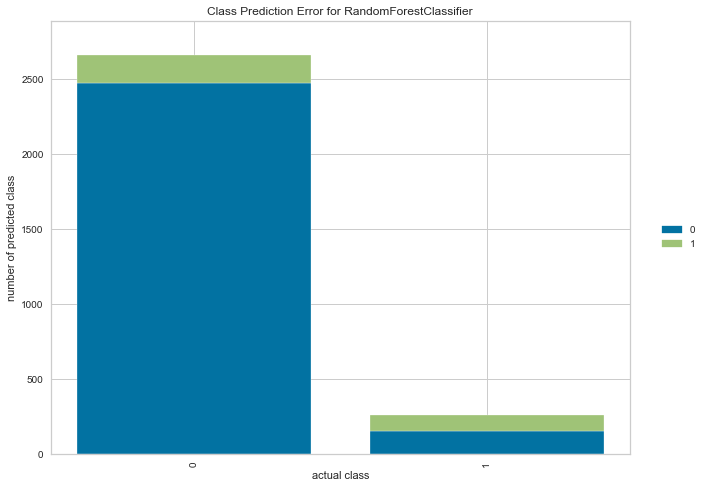

In [100]:
outcome = ['0', '1']

#val_y = new_val_df['outcome']
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    model_rfc,size=(800,500), classes=outcome
)

# Fit the training data to the visualizer
visualizer.fit(randomforest_feature_df_train_X, y_train_res)

# Evaluate the model on the test data
visualizer.score(final_X_val, final_y_val)

# Draw visualization
visualizer.show()

# 5. XGBoost

In [101]:
! pip install xgboost

In [102]:
! pip install xgboost -U

from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

Requirement already up-to-date: xgboost in /Users/megs/anaconda3/lib/python3.6/site-packages (1.1.1)


feature selection using XGBoost

In [103]:
#instantiate model and train
model = XGBClassifier(learning_rate = 0.001, n_estimators=100, max_depth=100)
model.fit(X_train_res, y_train_res)

XGBClassifier(learning_rate=0.001, max_depth=100)

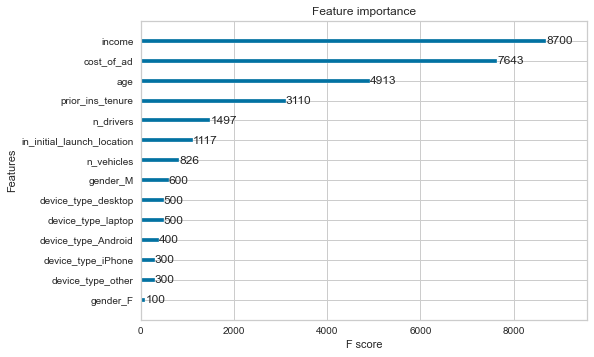

In [104]:
#plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model)
pyplot.show()

In [105]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_res)
    # train model
    selection_model = XGBClassifier()
    selection_model_1 =selection_model.fit(select_X_train, y_train_res)
    # eval model
    select_X_val = selection.transform(final_X_val)
    y_pred = selection_model_1.predict(select_X_val)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(final_y_val, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.001, n=14, Accuracy: 86.03%
Thresh=0.001, n=13, Accuracy: 85.89%
Thresh=0.001, n=12, Accuracy: 85.65%
Thresh=0.001, n=11, Accuracy: 85.55%
Thresh=0.002, n=10, Accuracy: 85.07%
Thresh=0.002, n=9, Accuracy: 85.48%
Thresh=0.016, n=8, Accuracy: 84.35%
Thresh=0.021, n=7, Accuracy: 84.35%
Thresh=0.034, n=6, Accuracy: 81.68%
Thresh=0.042, n=5, Accuracy: 77.95%
Thresh=0.046, n=4, Accuracy: 80.10%
Thresh=0.061, n=3, Accuracy: 73.42%
Thresh=0.084, n=2, Accuracy: 61.20%
Thresh=0.688, n=1, Accuracy: 52.98%


In [106]:
#lets select 14 features

In [107]:
X_xgboost = pd.concat([X_train_res, final_X_val], axis=0)
X_xgboost

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
0,45,0.004550,0,46800,2,1,8,1,0,0,0,0,1,0
1,59,0.004221,0,93232,1,2,2,0,0,0,1,0,0,1
2,42,0.003764,1,50932,2,1,8,0,1,0,0,0,0,1
3,39,0.005135,1,39431,1,1,6,0,0,1,0,0,0,1
4,46,0.004626,1,75183,1,2,14,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,43,0.004301,1,55102,2,1,5,0,1,0,0,0,0,1
8740,38,0.005378,0,40183,2,2,4,0,1,0,0,0,1,0
5439,31,0.004465,1,31874,2,1,6,0,0,0,1,0,1,0
5210,31,0.004597,1,32515,1,1,7,0,0,0,0,1,1,0


In [108]:
final_y_val = pd.DataFrame(final_y_val)
y_xgboost = pd.concat([y_train_res,final_y_val], axis = 0)
y_xgboost

,outcome
0,0
1,0
2,0
3,0
4,0
...,...
4076,1
8740,1
5439,0
5210,0


In [109]:
xgboost_cv_score = cross_val_score(selection_model_1, X_xgboost, y_xgboost, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
#print(confusion_matrix(final_y_val, predictions))
print(pd.DataFrame(confusion_matrix(final_y_val, predictions),
                  columns=['actual_neg', 'actual_pos'], index=['pred_neg', 'pred_pos']))
print('\n')
print("=== Classification Report ===")
print(classification_report(final_y_val, predictions))
print('\n')
print("=== All AUC Scores ===")
print(xgboost_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - XGBoost : ", xgboost_cv_score.mean())

=== Confusion Matrix ===
          actual_neg  actual_pos
pred_neg        1347        1279
pred_pos          94         200


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.51      0.66      2626
           1       0.14      0.68      0.23       294

    accuracy                           0.53      2920
   macro avg       0.53      0.60      0.44      2920
weighted avg       0.85      0.53      0.62      2920



=== All AUC Scores ===
[0.83351176 0.98026517 0.9900882  0.986162   0.98519983 0.99100272
 0.99003987 0.98387335 0.9888567  0.91156099]


=== Mean AUC Score ===
Mean AUC Score - XGBoost :  0.9640560567923793
